#**House Price Prediction in King County: A Regression Modeling Approach**

#**Overview**

This is a data set containing the sales prices of homes for King County that were sold between May 2014 - May 2015. The dataset consists of **21614 rows**  and **21 variables**. The dataset is accessible at https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data

This project focuses on predicting house prices by using a regression approach to understand the main factors that influence property prices.

Steps of the project:
* Data Understanding
* Exploratory Data Analysis (EDA)
* Data Preprocessing
* Regression Modeling
* Model Evaluation

#**Import Packages**

In [ ]:
#pip install pycaret lightgbm catboost xgboost shap tqdm

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from shap import TreeExplainer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**Import Dataset**

Explore the dataset, the possible features and the target variable. Check all columns and their types

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dibimbing/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#data = pd.read_csv('/content/sample_data/kc_house_data.csv')
#data.head()

Columns :

* id : unique ID for each home sold
* date : Date of the home sale
* price : Price of each home sold
* bedrooms : Number of bedrooms
* bathrooms : Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living : Square footage of the apartments interior living space
* sqft_lot : Square footage of the land space
* floors : Number of floors
* waterfront : A dummy variable for whether the apartment was overlooking the waterfront or not
* view : An index from 0 to 4 of how good the view of the property was
* condition : An index from 1 to 5 on the condition of the apartment,
* grade : An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above : The square footage of the interior housing space that is above ground level
* sqft_basement : The square footage of the interior housing space that is below ground level
* yr_built : The year the house was initially built
* yr_renovated : The year of the house’s last renovation
* zipcode : What zipcode area the house is in
* lat : Lattitude
* long : Longitude
* sqft_living15 : The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 : The square footage of the land lots of the nearest 15 neighbors



#**Data Understanding**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.drop(['id'], axis=1, inplace=True)

This section will drop id column since it is unique

In [ ]:
#Changes date to date time object
data['date'] = pd.to_datetime(data['date'])
print(data.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [ ]:
# Extract
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month
data['day'] = data.date.dt.day

#**Exploratory Data Analysis (EDA)**

* Check outliers
* Check distributions within the data
* Check correlation between features and drop unnecessary features



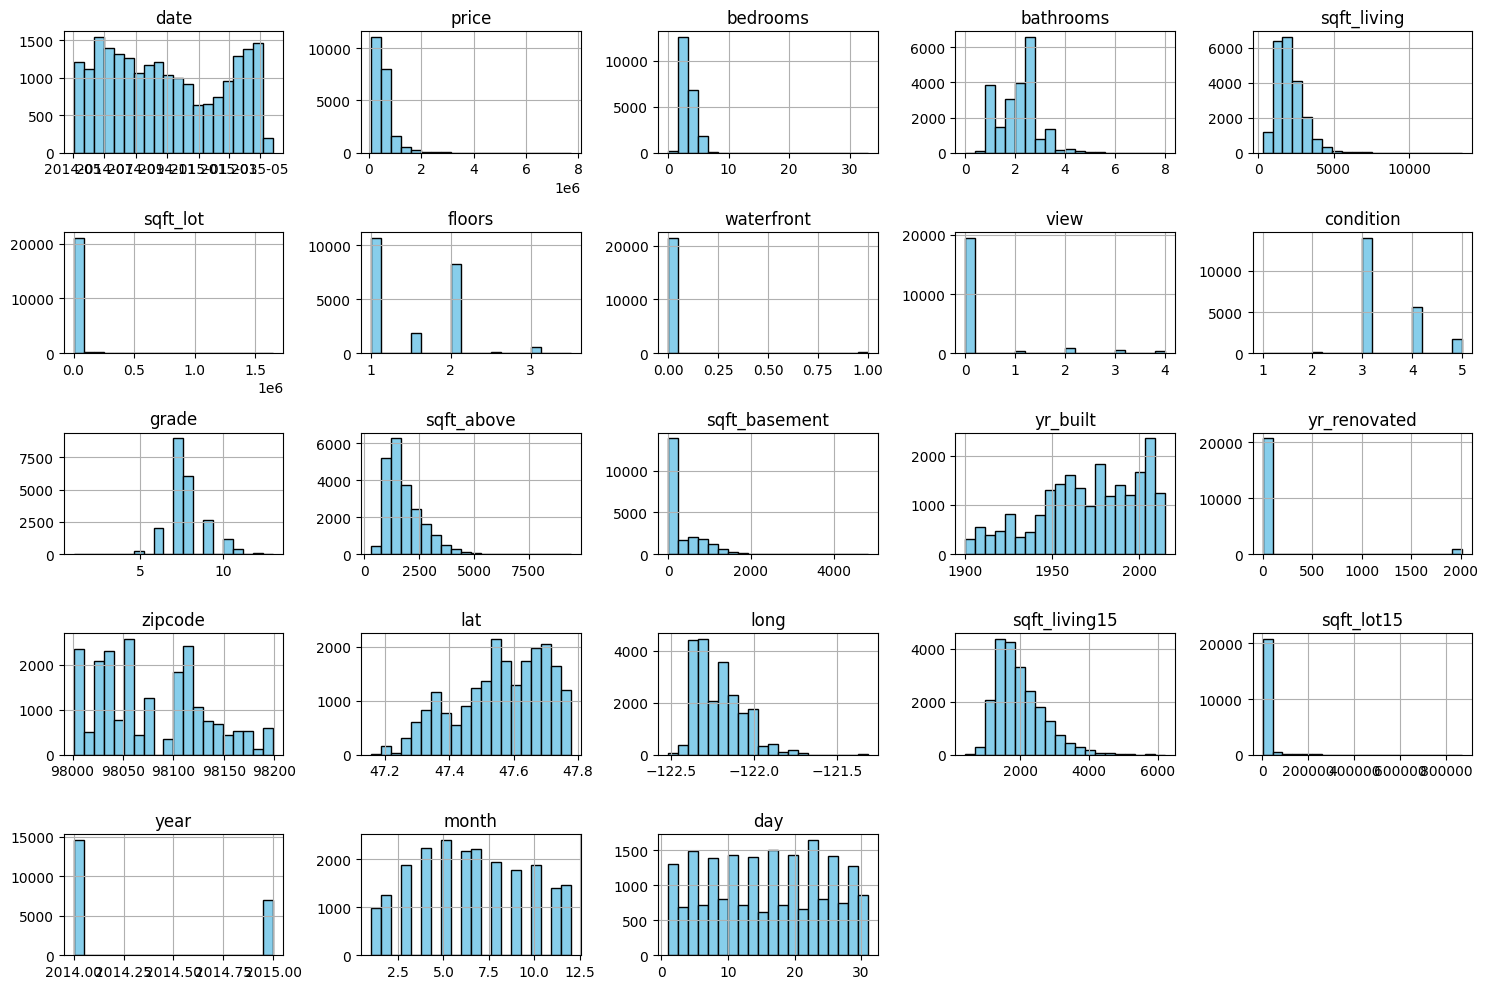

In [ ]:
#distribusi
data.hist(bins=20, color='skyblue', edgecolor='black', figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
data['bedrooms'] = data['bedrooms'].astype('category').cat.as_ordered()
data['bathrooms'] = data['bathrooms'].astype('category').cat.as_ordered()
data['floors'] = data['floors'].astype('category').cat.as_ordered()
data['waterfront'] = data['waterfront'].astype('category').cat.as_ordered()
data['view'] = data['view'].astype('category').cat.as_ordered()
data['condition'] = data['condition'].astype('category').cat.as_ordered()
data['grade'] = data['grade'].astype('category').cat.as_ordered()

Categorize these features into two distinct groups: numeric columns and categorical columns.

In [ ]:
categoricals = ['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition','grade']
numericals = ['price', 'sqft_living' , 'sqft_lot','sqft_above','sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [ ]:
summary_stats = data[numericals].describe()
summary_stats

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1.510697e+04,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,918.440897,4.142051e+04,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,1427.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068800e+04,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data[categoricals].describe()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
count,21613,21613.0,21613.0,21613,21613,21613,21613
unique,13,30.0,6.0,2,5,5,12
top,3,2.5,1.0,0,0,3,7
freq,9824,5380.0,10680.0,21450,19489,14031,8981


##Univariate Analysis

From the visualization below we can see the distribution is skewed to the right.



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



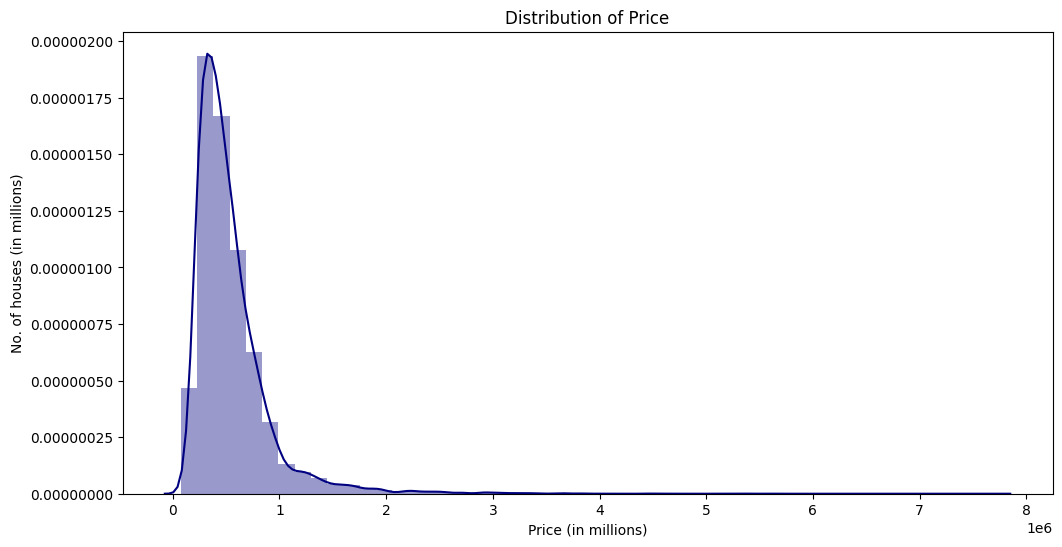

In [ ]:
#Distribution of target variable
plt.figure(figsize = (12, 6))

sns.distplot(data['price'], color = 'navy')
plt.ticklabel_format(style='plain', axis = 'y')

plt.title('Distribution of Price')
plt.xlabel('Price (in millions)')
plt.ylabel('No. of houses (in millions)')

plt.show()

What is the condition of most of the houses? What year were they built in? What are the most common values? Let's explore the data further to understand the data.

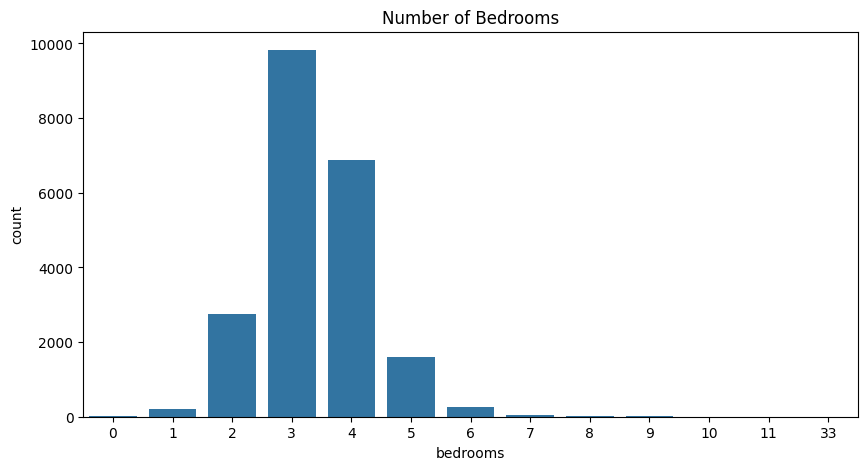

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='bedrooms', data=data)
plt.title('Number of Bedrooms')
plt.show()

In [ ]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

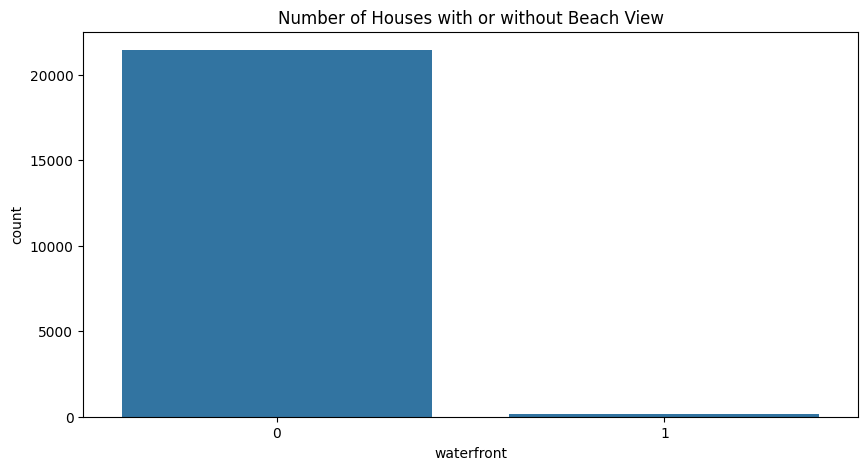

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='waterfront', data=data)
plt.title('Number of Houses with or without Beach View')
plt.show()

In [ ]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

##Biavariate Analysis

Text(0.5, 1.0, 'Price vs grade')

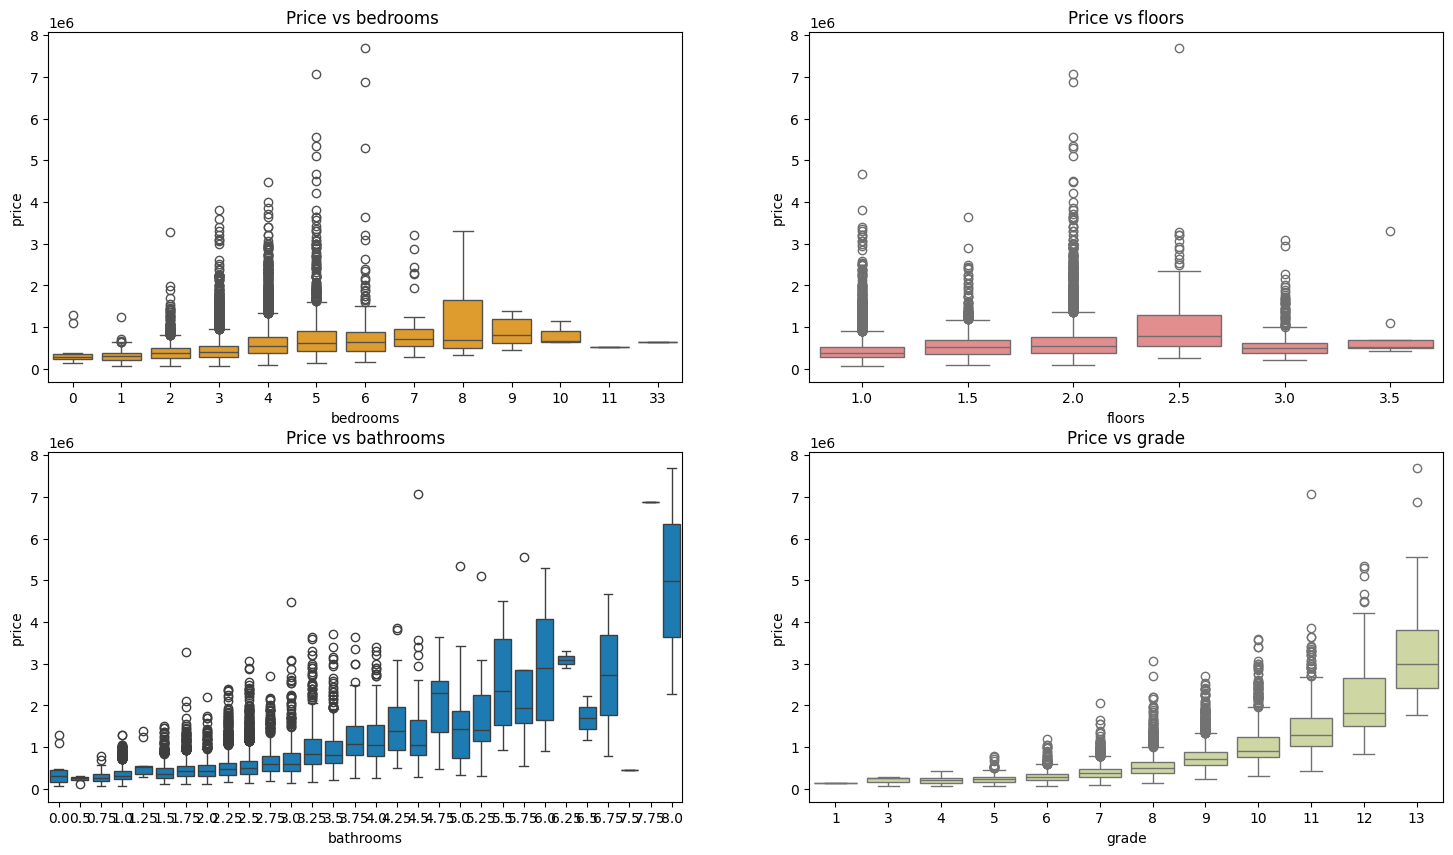

In [ ]:
fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
sns.boxplot(data=data, x=data["bedrooms"], y=data["price"], hue=None, color='#fca311', ax=ax)
ax.set_title("Price vs bedrooms ")

ax=fig.add_subplot(2,2,2)
sns.boxplot(data=data, x=data["floors"], y=data["price"], hue=None, color='#f08080', ax=ax)
ax.set_title("Price vs floors")

ax=fig.add_subplot(2,2,3)
sns.boxplot(data=data, x=data["bathrooms"], y=data["price"], hue=None, color='#0582ca', ax=ax)
ax.set_title("Price vs bathrooms")


ax=fig.add_subplot(2,2,4)
sns.boxplot(data=data, x=data["grade"], y=data["price"], hue=None, color='#d4e09b', ax=ax)
ax.set_title("Price vs grade")




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



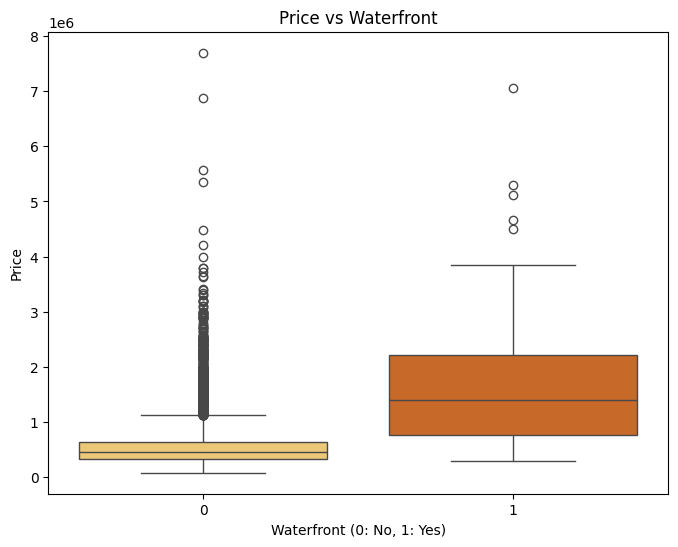

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["waterfront"], y=data["price"], palette="YlOrBr")
plt.title("Price vs Waterfront")
plt.xlabel("Waterfront (0: No, 1: Yes)")
plt.ylabel("Price")
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



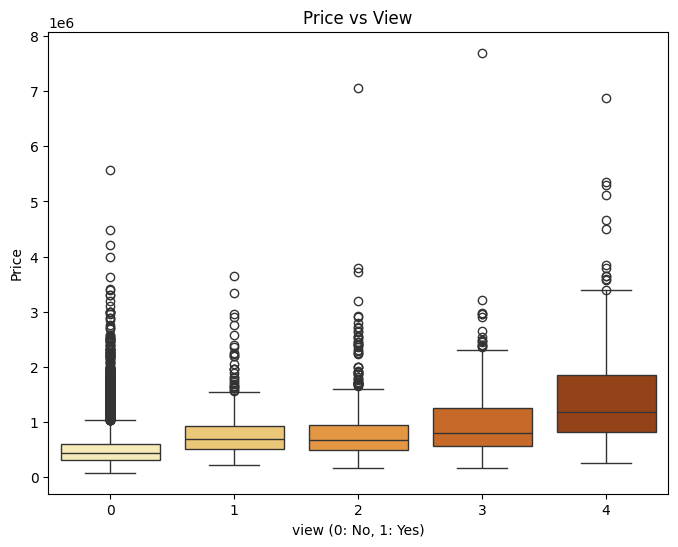

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["view"], y=data["price"], palette="YlOrBr")
plt.title("Price vs View")
plt.xlabel("view (0: No, 1: Yes)")
plt.ylabel("Price")
plt.show()

<Axes: xlabel='waterfront', ylabel='price'>

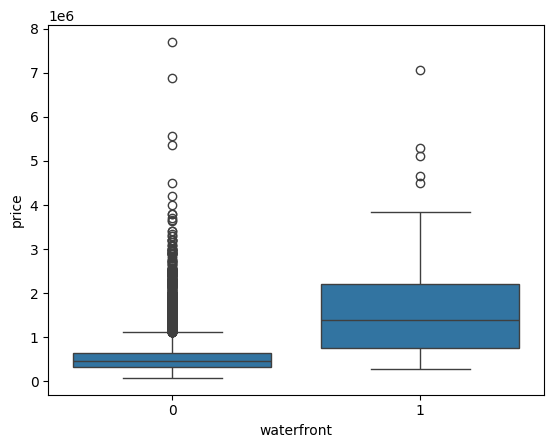

In [ ]:
sns.boxplot(data=data,x=data['waterfront'],y=data['price'])

Homes with waterfront views have a wider price range, while properties outside the waterfront tend to have more consistent prices. Homes with waterfront views are significantly more expensive than those without, indicating the added value of a beautiful view.

Text(0, 0.5, 'price')

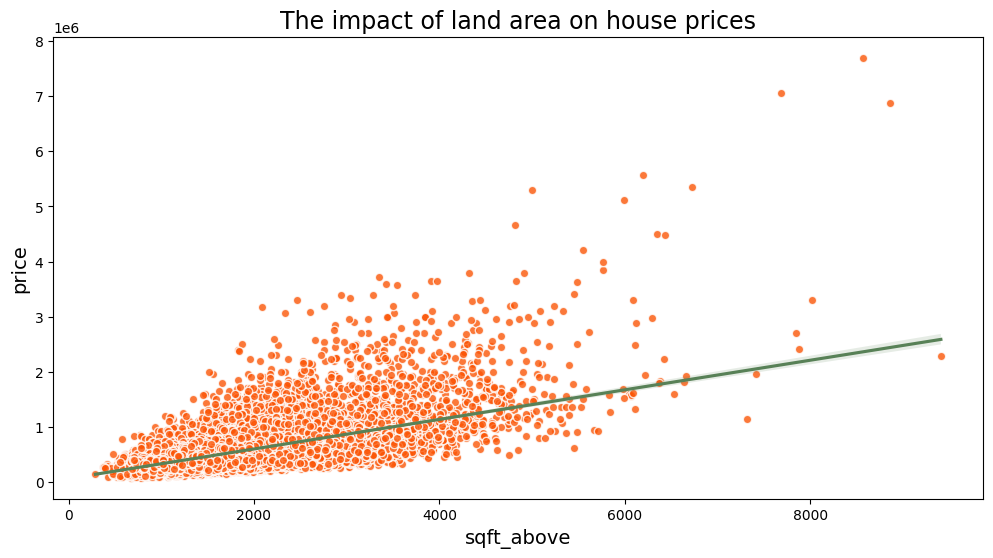

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data, x='sqft_above', y='price', color='#fb5607',
            scatter_kws={'edgecolor': 'white'}, line_kws={"color": "#588157"})
plt.title('The impact of land area on house prices', fontsize=17)
plt.xlabel('sqft_above', fontsize=14)
plt.ylabel('price', fontsize=14)

Text(0, 0.5, 'price')

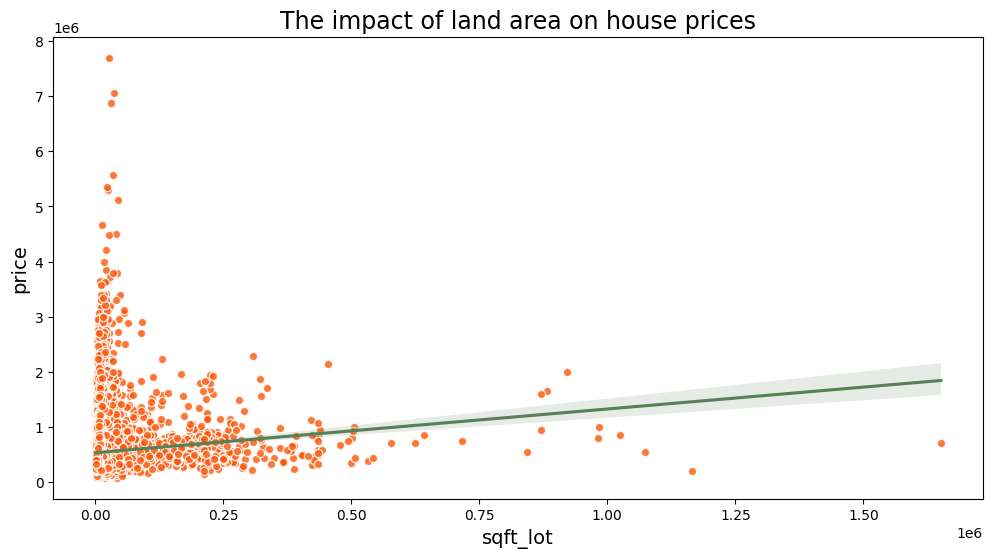

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data, x='sqft_lot', y='price', color='#fb5607',
            scatter_kws={'edgecolor': 'white'}, line_kws={"color": "#588157"})
plt.title('The impact of land area on house prices', fontsize=17)
plt.xlabel('sqft_lot', fontsize=14)
plt.ylabel('price', fontsize=14)

Text(0, 0.5, 'price')

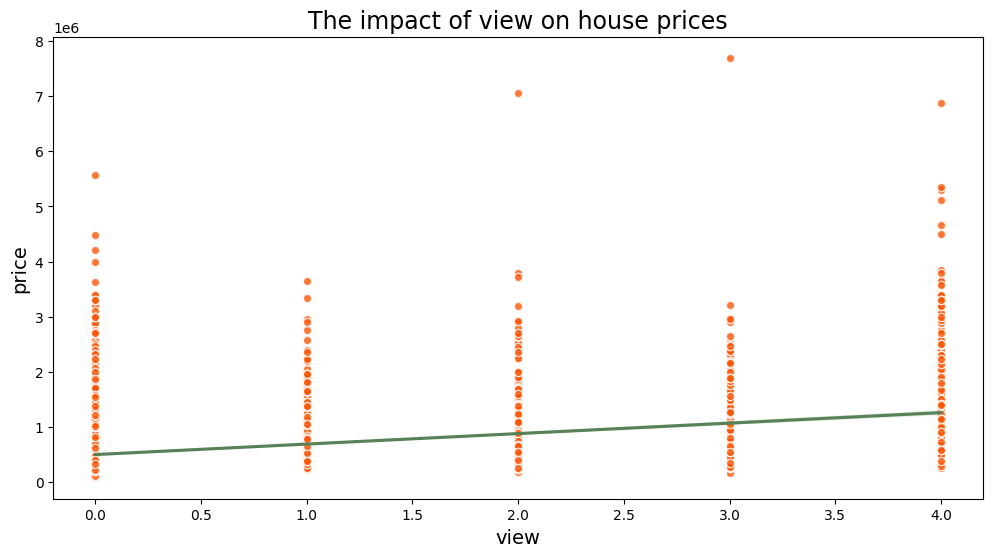

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data, x='view', y='price', color='#fb5607',
            scatter_kws={'edgecolor': 'white'}, line_kws={"color": "#588157"})
plt.title('The impact of view on house prices', fontsize=17)
plt.xlabel('view', fontsize=14)
plt.ylabel('price', fontsize=14)

The graph above illustrates that most homes do not have good views, resulting in a lower price range. Homes with a view rating of 4 tend to be very expensive, signifying the value associated with exceptional views.

Text(0, 0.5, 'price')

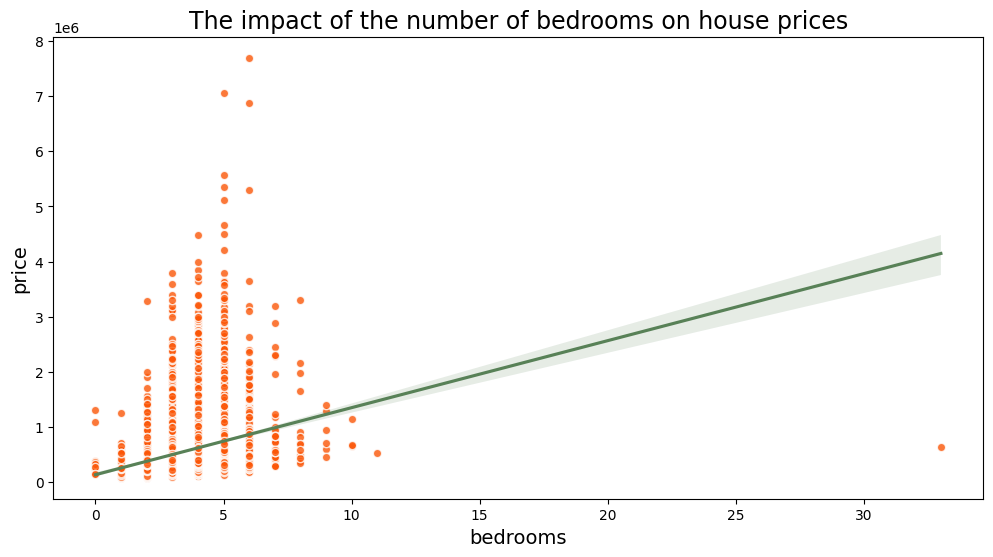

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data, x='bedrooms', y='price', color='#fb5607',
            scatter_kws={'edgecolor': 'white'}, line_kws={"color": "#588157"})
plt.title('The impact of the number of bedrooms on house prices', fontsize=17)
plt.xlabel('bedrooms', fontsize=14)
plt.ylabel('price', fontsize=14)

The observable pattern is that prices tend to increase as the number of bedrooms increases. Each point in the plot represents an outlier, which usually indicates a higher house price. Notably, there is one outlier in the bedroom variable, which indicates a house with 33 bedrooms.

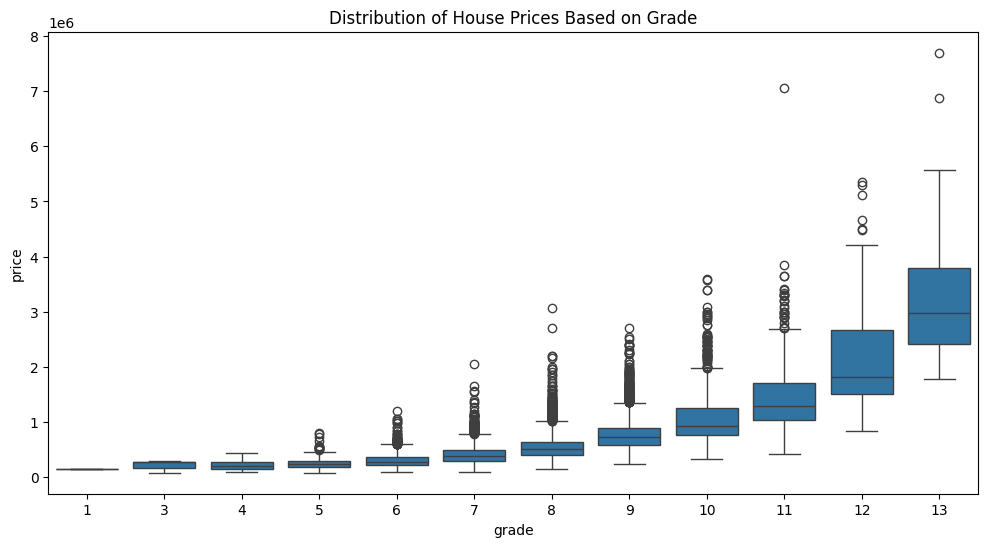

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='price', data=data)
plt.title('Distribution of House Prices Based on Grade')
plt.show()

As construction and design quality improves, property prices tend to increase.
This relationship suggests that superior construction and design quality will result in higher prices in the real estate market.

Now, let's check which variables have a significant relationship with the other variables. We will create a correlation matrix that is easy to interpret.

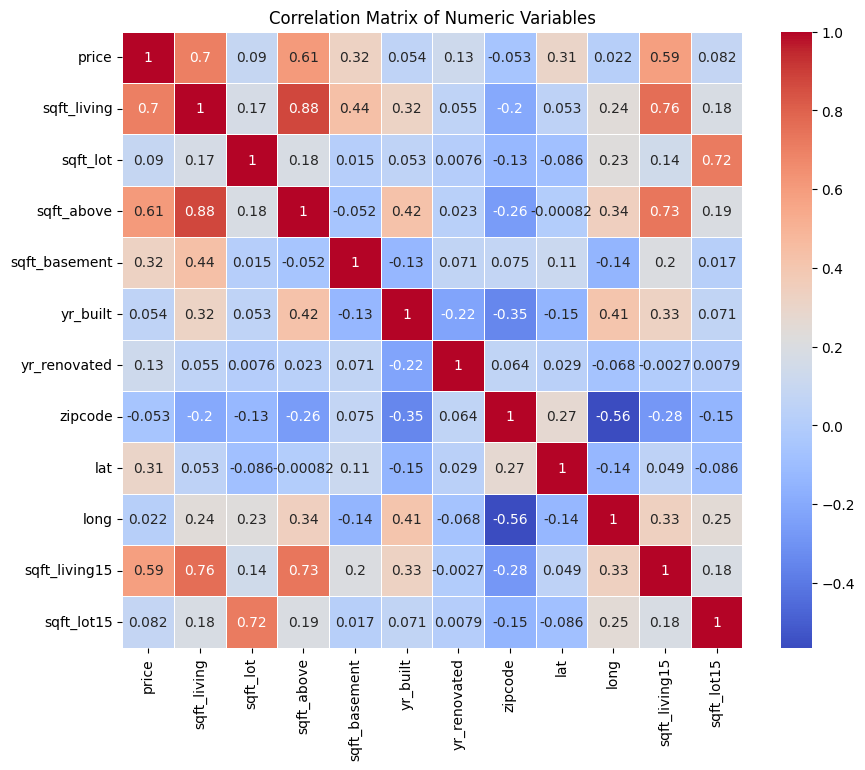

In [ ]:
correlation_matrix = data[numericals].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


#Data Cleaning

In [ ]:
#Checking Duplicates Data
data.duplicated().sum()

0

In [ ]:
#Checking Null Value
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

There are no missing values and duplicate data detected from the dataset. Great!

In [ ]:
#data.drop(['id'], axis=1, inplace=True)

In [ ]:
#data['date'] = pd.to_datetime(data['date'])
#print(data.dtypes)

In [ ]:
# Extract
#data['year'] = data.date.dt.year
#data['month'] = data.date.dt.month
#data['day'] = data.date.dt.day

At the EDA stage, we observe that the bedroom has outliers. There is a house with 0 bedrooms, it is very unlikely right? I will remove them.

In [ ]:
bedrooms_upper_bound = 11

# Filter data
data = data[data['bedrooms'] <= bedrooms_upper_bound]
data = data[data['bedrooms'] != 0]
data = data[data['bathrooms'] != 0]
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


The strong outlier in 'bedrooms' was removed. There are no longer houses with 0 bedrooms or bathrooms

In [ ]:
#Drop column date
data.drop(['date'], axis=1, inplace=True)

In [ ]:
def train_and_evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared: {r2}')

In [ ]:
#split data
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], data.shape[0])
)

train size=15117, test_size=6479, total_size=21596


The dataset will be split into 70% train and 30% test.

In [ ]:
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
}

# Compare model
for model_name, regression_model in regression_models.items():
    print(f'\n{model_name}:')
    train_and_evaluate_regression_model(regression_model, X_train, X_test, y_train, y_test)


Linear Regression:
Mean Squared Error: 39551687239.03903
Mean Absolute Error: 122952.9510738508
Root Mean Squared Error: 198876.05999475913
R-squared: 0.7101177881517419

Random Forest:
Mean Squared Error: 16658919793.423538
Mean Absolute Error: 69439.09950663683
Root Mean Squared Error: 129069.43787521328
R-squared: 0.8779034510579915

Decision Tree:
Mean Squared Error: 38856338482.6486
Mean Absolute Error: 103711.80915264701
Root Mean Squared Error: 197120.11181675145
R-squared: 0.7152141380063048


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)


print(f'R2 Score is : {r2_score(y_test,y_pred)}')
print(f'Mae is : {mean_absolute_error(y_test,y_pred)}')

R2 Score is : 0.7101177881517419
Mae is : 122952.9510738508


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=200,random_state=5,max_samples=0.9,max_features=0.80,max_depth=20, min_samples_leaf =1, min_samples_split=2)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)


print(f'R2 Score is : {r2_score(y_test,y_pred)}')
print(f'Mae is : {mean_absolute_error(y_test,y_pred)}')

R2 Score is : 0.8810326018335755
Mae is : 68917.90788747485


Lets see if we can improve accuracy of the model using GridSearchCV.

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Model Random Forest
rf_model = RandomForestRegressor()

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Cross-validation with KFold
cv_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# Best hyperparameter search
scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring=scorer, cv=cv_rf)
grid_result_rf = grid_search_rf.fit(X_train, y_train)

print(f'Best Hyperparameters for Random Forest: {grid_result_rf.best_params_}')
print(f'Best MSE for Random Forest: {-grid_result_rf.best_score_}')

# Evaluate the best model on test data
best_rf_model = grid_result_rf.best_estimator_
predictions_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, predictions_rf)
print(f'Mean Squared Error on Test Set (Random Forest): {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')
print(f'R-quared : {r2_rf}')


Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best MSE for Random Forest: 17586082278.071697
Mean Squared Error on Test Set (Random Forest): 16730252503.654856
Mean Absolute Error: 69474.10841300183
Root Mean Squared Error: 129345.47732199551
R-quared : 0.8773806393838899


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression

selector = RFE(estimator=rf_model, n_features_to_select=5)

# Fit dan transform data
X_selected = selector.fit_transform(X, y)

In [ ]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
#shap.summary_plot(shap_values, X_test)
print("Shap Values :" , shap_values)

Shap Values : [[ 5.80564762e+02  8.81777368e+02  2.30565121e+04 ...  2.63552346e+03
   4.63685092e+03 -5.43700970e+02]
 [ 5.57110080e+02 -1.61017888e+03 -6.80738520e+04 ...  4.93021500e+03
   5.65692123e+03  6.65916785e+03]
 [ 5.01206553e+02 -2.01068156e+01 -1.29620085e+05 ...  3.21730260e+03
   4.27944683e+03 -1.05287859e+03]
 ...
 [ 3.36079518e+02 -6.38183263e+03 -7.90133405e+04 ... -1.14513596e+03
  -2.65256869e+03  4.48508456e+02]
 [ 1.82661309e+02 -4.97182579e+01 -2.37791321e+04 ... -1.42003766e+03
  -1.37725124e+03 -6.82445547e+02]
 [-3.40180787e+02 -4.53408366e+03  4.77461558e+04 ... -8.92223943e+02
   6.02672921e+02 -1.69389953e+03]]


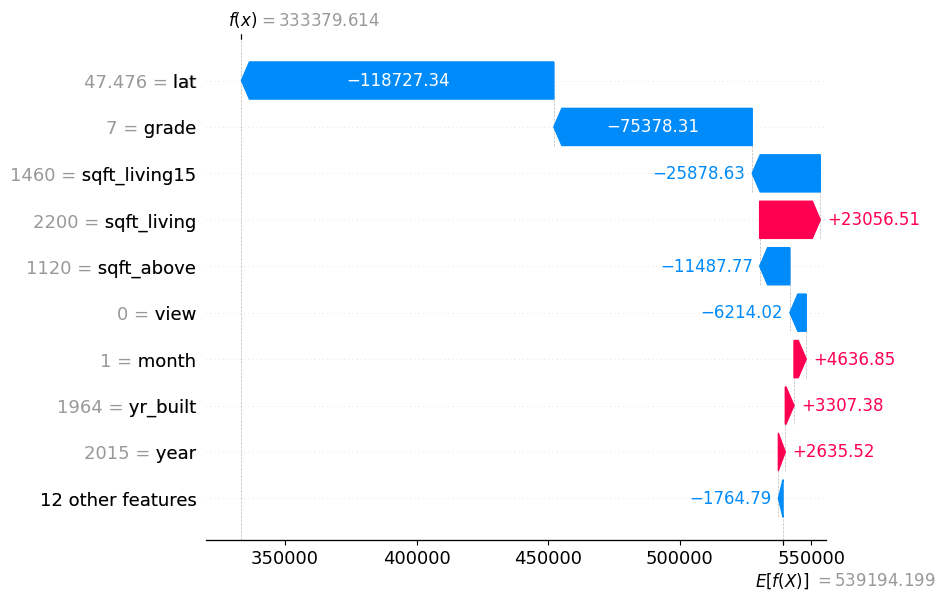

In [ ]:
shap_explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test)
shap.plots.waterfall(shap_explanation[0])

In [ ]:
model.predict(X_test.head(1))

array([434543.43059722])

In [ ]:
shap_for_first_row_of_X_test = pd.DataFrame(
    data = explainer.shap_values(X_test.head(1)),
    index = X_test.head(1).index,
    columns = X_test.columns
)

shap_for_first_row_of_X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
304,580.564762,881.777368,23056.512128,-2026.44704,-97.103945,-2021.40837,-6214.021224,2528.88697,-75378.314834,-11487.765009,...,3307.384656,-477.549044,-1198.616687,-118727.335236,1095.534832,-25878.63424,-1492.906244,2635.523459,4636.850922,-543.70097


In [ ]:
shap_for_first_row_of_X_test.sum(axis = 1)

304   -205814.58454
dtype: float64

In [ ]:
shap_for_first_row_of_X_test.sum(axis = 1).values[0] + 0.26

-205814.32453989403

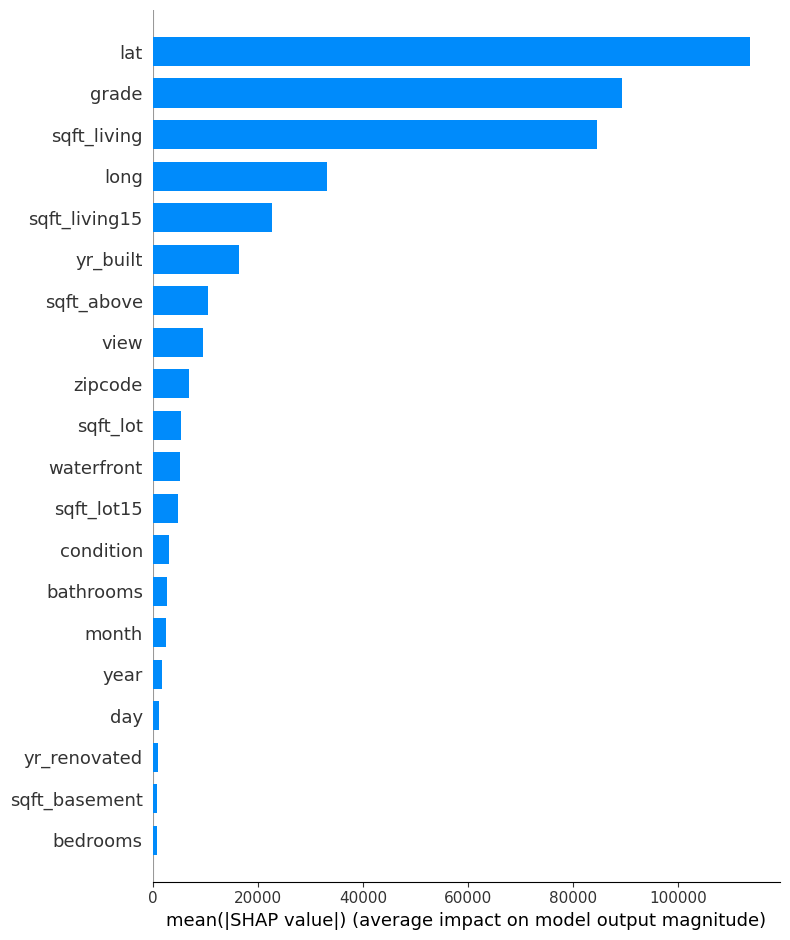

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")